<a href="https://colab.research.google.com/github/eblio/dlolc/blob/main/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Premier réseau de neurones 

## Premier réseau de neurones convolutifs qui permets de distinguer chacuns des dix champions sur une image. 

In [3]:
import os
import shutil


import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

In [2]:
!git clone https://github.com/eblio/dlolc.git
!git config --global user.email "alexauragan@gmail.com"
!git config --global user.name "Alexandre D"

Cloning into 'dlolc'...
remote: Enumerating objects: 22475, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 22475 (delta 3), reused 8 (delta 2), pack-reused 22466
Receiving objects: 100% (22475/22475), 4.17 GiB | 24.76 MiB/s, done.
Resolving deltas: 100% (2036/2036), done.
Checking out files: 100% (15627/15627), done.


In [5]:
path = "./dlolc/data/"
labels = ["Chogath", "Ezreal", "Lucian", "Malzahar", "Morgana", "Poppy", "Reksai", "Senna", "Syndra", "Teemo"]
num_classes = len(labels)
taile_image = 128

#x_train, y_train = load_data(path, labels, dataset='train', image_size=600)
#print(x_train.shape, y_train.shape)

#x_val, y_val = load_data(path, labels, dataset='validation', image_size=600)
#print(x_val.shape, y_val.shape)

#x_test, y_test = load_data(path, labels, dataset='test', image_size=600)
#print(x_test.shape, y_test.shape)

#class_num = y_test.shape[1]

#plt.figure(figsize=(12, 12))
#shuffle_indices = np.random.permutation(9)
#for i in range(0, 9):
#    plt.subplot(3, 3, i+1)
#    image = x_train[shuffle_indices[i]]
#    plt.title(labels[int(y_train[shuffle_indices[i]])])
#    plt.imshow(image/255)

#plt.tight_layout()
#plt.show()
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [4]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

# load and iterate training dataset
train_it = datagen.flow_from_directory('./dlolc/data/train/', class_mode='categorical', batch_size=64, target_size= (128,128))
# load and iterate validation dataset
val_it = datagen.flow_from_directory('./dlolc/data/validation/', class_mode='categorical', batch_size=64, target_size= (128,128))
# load and iterate test dataset
test_it = datagen.flow_from_directory('./dlolc/data/test/', class_mode='categorical', batch_size=64, target_size= (128,128))
x, y = train_it.next()
print(x.shape)

Found 6408 images belonging to 10 classes.
Found 2140 images belonging to 10 classes.
Found 2142 images belonging to 10 classes.
(64, 128, 128, 3)


In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(taile_image,taile_image,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes))
model.add(Activation('softmax'))



optimizer = 'adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
model.save("./dlolc/keras models/premier_model")
print(model.summary())

INFO:tensorflow:Assets written to: ./dlolc/keras models/premier_model/assets
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_____________________________________________

In [6]:
step_size_train = train_it.n//train_it.batch_size
step_size_valid = val_it.n//val_it.batch_size

history  = model.fit(train_it,
          epochs = 15,
          verbose = 1,
          batch_size = 64,
          validation_data = val_it)
model.save("./dlolc/keras models/premier_model_entrainé")

Epoch 1/15
101/101 [==============================] - 47s 116ms/step - loss: 0.9219 - accuracy: 0.7189 - val_loss: 0.5498 - val_accuracy: 0.8168
Epoch 2/15
101/101 [==============================] - 10s 102ms/step - loss: 0.1068 - accuracy: 0.9694 - val_loss: 0.1334 - val_accuracy: 0.9565
Epoch 3/15
101/101 [==============================] - 10s 103ms/step - loss: 0.0749 - accuracy: 0.9792 - val_loss: 0.2452 - val_accuracy: 0.9215
Epoch 4/15
101/101 [==============================] - 10s 103ms/step - loss: 0.0565 - accuracy: 0.9857 - val_loss: 0.1733 - val_accuracy: 0.9500
Epoch 5/15
101/101 [==============================] - 11s 104ms/step - loss: 0.0343 - accuracy: 0.9916 - val_loss: 0.0680 - val_accuracy: 0.9808
Epoch 6/15
101/101 [==============================] - 11s 105ms/step - loss: 0.0194 - accuracy: 0.9955 - val_loss: 0.0738 - val_accuracy: 0.9799
Epoch 7/15
101/101 [==============================] - 11s 106ms/step - loss: 0.0118 - accuracy: 0.9976 - val_loss: 0.0703 - val_ac

In [7]:
loss,acc = model.evaluate(test_it)
print("Accuracy : "+ str(acc*100) +"%")

34/34 [==============================] - 2s 48ms/step - loss: 0.0519 - accuracy: 0.9823
Accuracy : 98.22595715522766%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


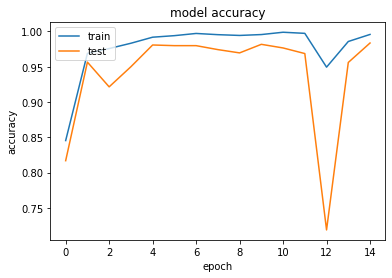

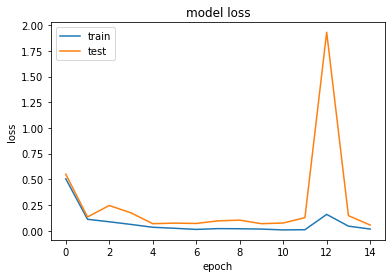

In [8]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
!zip -r /content/file.zip /content/dlolc/keras\ models
from google.colab import files
files.download("/content/file.zip")

  adding: content/dlolc/keras models/ (stored 0%)
  adding: content/dlolc/keras models/premier_model/ (stored 0%)
  adding: content/dlolc/keras models/premier_model/variables/ (stored 0%)
  adding: content/dlolc/keras models/premier_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/dlolc/keras models/premier_model/variables/variables.index (deflated 73%)
  adding: content/dlolc/keras models/premier_model/saved_model.pb (deflated 90%)
  adding: content/dlolc/keras models/premier_model/assets/ (stored 0%)
  adding: content/dlolc/keras models/premier_model_entrainé/ (stored 0%)
  adding: content/dlolc/keras models/premier_model_entrainé/variables/ (stored 0%)
  adding: content/dlolc/keras models/premier_model_entrainé/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/dlolc/keras models/premier_model_entrainé/variables/variables.index (deflated 74%)
  adding: content/dlolc/keras models/premier_model_entrainé/saved_model.pb (deflated 91%)
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Donc là on a une grosse accuracy, c'est normal parce que les vidéos sont continues, on essaie avec un second set de données


In [51]:
# load and iterate training dataset
train_it2 = datagen.flow_from_directory('./dlolc/data/train2/', class_mode='categorical', batch_size=64, target_size= (128,128))
# load and iterate validation dataset
val_it2 = datagen.flow_from_directory('./dlolc/data/validation2/', class_mode='categorical', batch_size=64, target_size= (128,128))
# load and iterate test dataset
test_it2 = datagen.flow_from_directory('./dlolc/data/test2/', class_mode='categorical', batch_size=64, target_size= (128,128))

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(taile_image,taile_image,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes/2))
model.add(Activation('softmax'))



optimizer = 'adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
model.save("./dlolc/keras models/premier_model_taille_5")
print(model.summary())

step_size_train = train_it2.n//train_it2.batch_size
step_size_valid = val_it2.n//val_it2.batch_size

history  = model.fit(train_it2,
          epochs = 15,
          verbose = 1,
          batch_size = 64,
          validation_data = val_it2)
model.save("./dlolc/keras models/premier_model_entrainé_sur_set_2")



Found 3054 images belonging to 5 classes.
Found 1020 images belonging to 5 classes.
Found 839 images belonging to 5 classes.
INFO:tensorflow:Assets written to: ./dlolc/keras models/premier_model_taille_5/assets
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
activation_9 (Activation)    (None, 128, 128, 64)      0         
_________________________________________

In [52]:

loss,acc = model.evaluate(test_it2)
print("Accuracy : "+ str(acc*100) +"%")

14/14 [==============================] - 1s 66ms/step - loss: 1.1914 - accuracy: 0.7712
Accuracy : 77.11561322212219%


là d'un coup on drop en accuracy, c'est normal parce qu'on a un meilleur ensemble de photos de tests. On pourrait retenter avec des photos plus compliquées encore mais j'ai pas le time de tout filmer huit fois.
ON A SURAPPRENTIS DE OUF

In [23]:
# load and iterate training dataset
train_it2 = datagen.flow_from_directory('./dlolc/data/train2/', class_mode='categorical', batch_size=64, target_size= (128,128))
# load and iterate validation dataset
val_it2 = datagen.flow_from_directory('./dlolc/data/validation2/', class_mode='categorical', batch_size=64, target_size= (128,128))
# load and iterate test dataset
test_it2 = datagen.flow_from_directory('./dlolc/data/test2/', class_mode='categorical', batch_size=64, target_size= (128,128))


Found 3054 images belonging to 5 classes.
Found 1020 images belonging to 5 classes.
Found 839 images belonging to 5 classes.


le droupout sert à éviter le surapprentissage mais ça n'a pas servit à grand chose ici

Confusion Matrix


ValueError: ignored

In [53]:
probabilities = model.predict(test_it2)
prediction = np.zeros_like(probabilities)
prediction[np.arange(len(probabilities)), probabilities.argmax(1)] = 1
prediction = np.argmax(prediction, axis = 1)
real_classes = test_it2.classes

classes = ["chogath","ezreal","morgana","poppy","senna"]
print(classification_report(test_it2.classes, prediction, target_names= classes))
print(confusion_matrix(real_classes, prediction))

              precision    recall  f1-score   support

     chogath       0.15      0.14      0.14       127
      ezreal       0.14      0.19      0.16       138
     morgana       0.24      0.12      0.16       166
       poppy       0.30      0.35      0.32       217
       senna       0.21      0.20      0.21       191

    accuracy                           0.21       839
   macro avg       0.21      0.20      0.20       839
weighted avg       0.22      0.21      0.21       839

[[18 30 10 36 33]
 [25 26 10 43 34]
 [28 36 20 44 38]
 [25 54 17 77 44]
 [26 42 26 58 39]]
